In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
Xpath = 'Data/X/'
weather_df = pd.read_csv(Xpath + "hourly_weather_newark.csv")
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
weather_df["Date"] = weather_df["Date"].dt.round('h')
weather_df

,Date,Temperature (F),Dew Point (F),Humidity (%),Wind,Wind Speed (mph),Wind Gust (mph),Pressure (in),Precipitation (in),Condition
0,2019-01-01 02:00:00,46.0,46.0,100.0,CALM,0.0,0.0,29.73,0.1,Light Rain
1,2019-01-01 03:00:00,47.0,46.0,97.0,CALM,0.0,0.0,29.67,0.0,Light Rain
2,2019-01-01 04:00:00,46.0,46.0,100.0,SW,3.0,0.0,29.62,0.0,Fog
3,2019-01-01 04:00:00,47.0,47.0,100.0,WSW,5.0,0.0,29.62,0.0,Fog
4,2019-01-01 04:00:00,47.0,47.0,100.0,W,6.0,0.0,29.63,0.0,Light Rain
...,...,...,...,...,...,...,...,...,...,...
59707,2024-12-31 23:00:00,46.0,43.0,89.0,NE,13.0,0.0,29.55,0.4,T-Storm
59708,2024-12-31 23:00:00,46.0,43.0,89.0,NE,10.0,22.0,29.53,0.1,Light Rain with Thunder
59709,2025-01-01 00:00:00,46.0,43.0,89.0,NE,13.0,0.0,29.49,0.1,Light Rain
59710,2024-12-31 00:00:00,47.0,44.0,90.0,N,5.0,0.0,29.49,0.0,Cloudy


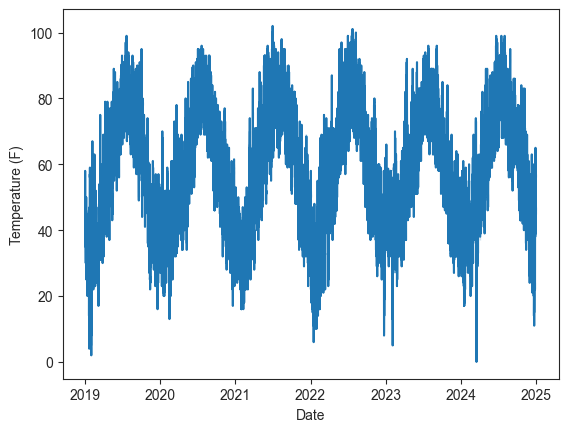

In [25]:
import os

sns.set_style("ticks")

Ypath = "Data/Y/"

files = os.listdir(Ypath)

sns.lineplot(
        data = weather_df,
        x="Date", y="Temperature (F)",
)

rate_classes = {}

for file in files:
    df = pd.read_excel(Ypath + file)
    name = file.removesuffix("_cleaned.xlsx")

    rate_classes[name] = df
    
    df.rename(columns={name: "Load"}, inplace=True)
    df["Load"] = df["Load"] / 1000 # make sure all load units are in megawatts, MW = KW/1000
    df["Date"] = pd.to_datetime(df["Date"])

    """
    fig, ax = plt.subplots(figsize=(10, 4)) # width and height in inches
    ax.set_title(f'{name} Rate Class')
    ax.set(xlabel='Date', ylabel='Load (MWh)')

    sns.lineplot(
         data = df,
         x="Date", y="Load",
         ax=ax
    )
    sns.despine()
    """

                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2019-01-01 01:00:00  1.528514             40.0           25.0   
1     2019-01-01 02:00:00  1.426460             46.0           46.0   
2     2019-01-01 03:00:00  1.360703             47.0           46.0   
3     2019-01-01 04:00:00  1.340555             46.0           46.0   
4     2019-01-01 04:00:00  1.340555             47.0           47.0   
...                   ...       ...              ...            ...   
59707 2024-12-31 23:00:00  1.731281             46.0           42.0   
59708 2024-12-31 23:00:00  1.731281             46.0           42.0   
59709 2024-12-31 23:00:00  1.731281             46.0           43.0   
59710 2024-12-31 23:00:00  1.731281             46.0           43.0   
59711 2025-01-01 00:00:00  1.617796             46.0           43.0   

       Humidity (%)  Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              55.0   NNW               8.0              0.0        

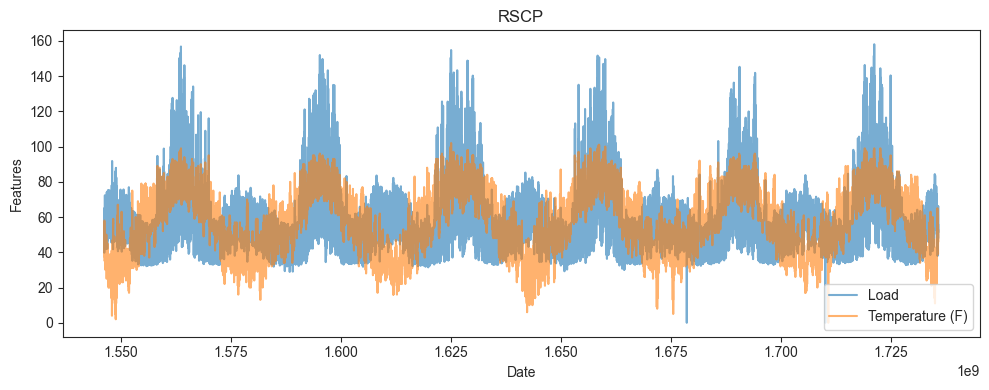

In [216]:
feature_matrix = rate_classes['RSCP'].merge(weather_df, on='Date')
print(feature_matrix)
# to POSIX Timestamp (number of seconds that have passed since January 1, 1970)
#feature_matrix = feature_matrix[['Date', 'Load', 'Temperature (F)', 'Humidity (%)']]
feature_matrix['Date'] = feature_matrix['Date'].apply(lambda t: int(t.timestamp()))

# Scale the load so that the values are closer to the temperature values
feature_matrix['Load'] = feature_matrix['Load'] * (feature_matrix['Temperature (F)'].mean() / feature_matrix['Load'].mean())

fig, ax = plt.subplots(figsize=(10, 4)) # width and height in inches
ax.set_title(f'RSCP')
ax.set(xlabel='Date', ylabel='Features')

ax.plot(
    feature_matrix["Date"],
    feature_matrix["Load"],
    label="Load",
    alpha=0.6
)
ax.plot(
    feature_matrix["Date"],
    feature_matrix["Temperature (F)"],
    label="Temperature (F)",
    alpha=0.6
)

ax.legend()
plt.tight_layout()
plt.show()

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 40.0          55.0             1600.0   
1                 46.0         100.0             2116.0   
2                 47.0          97.0             2209.0   
3                 46.0         100.0             2116.0   
4                 47.0         100.0             2209.0   
...                ...           ...                ...   
59707             46.0          86.0             2116.0   
59708             46.0          86.0             2116.0   
59709             46.0          89.0             2116.0   
59710             46.0          89.0             2116.0   
59711             46.0          89.0             2116.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2200.0          3025.0            64000.0   
1                            4600.0         10000.0            97336.0   
2                            4559.0          9409.0           103823.

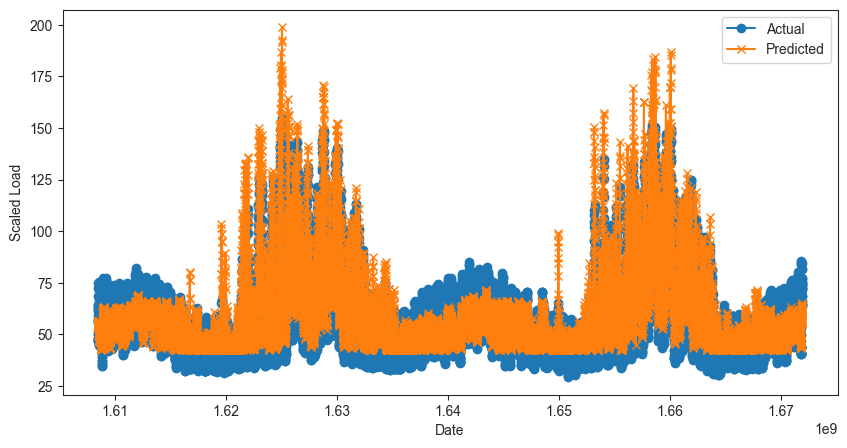

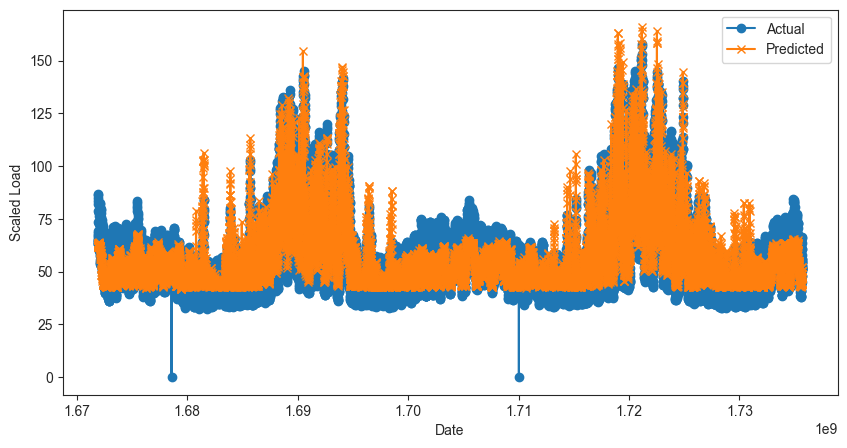

91.26254212623232


In [237]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()

NUM_SPLITS = 2

tscv = TimeSeriesSplit(n_splits=NUM_SPLITS)

poly = poly = PolynomialFeatures(degree=3, include_bias=False)


X = feature_matrix[['Temperature (F)', 'Humidity (%)']].copy()
X = pd.DataFrame(poly.fit_transform(X), columns=poly.get_feature_names_out(X.columns))

print(X)

y = feature_matrix['Load']

err = 0
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(feature_matrix['Date'].iloc[test_idx], y_test, label='Actual', marker='o')
    plt.plot(feature_matrix['Date'].iloc[test_idx], y_pred, label='Predicted', marker='x')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Scaled Load')
    plt.show()

    err += mean_squared_error(y_test, y_pred)

print(err / NUM_SPLITS)
